<a href="https://colab.research.google.com/github/ANDUGULA-SAI-KIRAN/SMS-Spam-Classifer/blob/main/SMS_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SMS spam classifier

## **Objective of Project**

**Problem Statement:** In today's technologically advanced world, there is a high likelihood of fraudulent transactions and the dissemination of fraudulent information. One such instance is SMS spam detection. The objective is to develop a machine learning model capable of predicting whether an SMS is spam or not-spam (ham), thereby enhancing the user experience and mitigating the risk of falling victim to spam-related scams.

## **EDA**

### **About dataset**

link to data set - https://docs.google.com/spreadsheets/d/1Dj7kdLsjHjTGFp0lOQ-KJnzTSmEMkkKvo-ZokTxBkNA/edit?usp=sharing

This data is gathered from Kaggle website

column(v1) - Spam/ham

column(v2) - sms text

In [ ]:
#importing libraries

#libraries for reading and manipulation
import pandas as pd
import numpy as np

#libraries for visualizing data
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for data modelling, evaluating
from sklearn.preprocessing import LabelEncoder
import nltk
!pip install nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#to suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#the file contains characters that cannot be decoded by pd.read_csv, using encoding techniques
#loading dataset from local drive
try:
    sms_df = pd.read_csv('/content/SMS spam classifier.csv', encoding='utf-8')
except UnicodeDecodeError:
    sms_df = pd.read_csv('/content/SMS spam classifier.csv', encoding='latin1')


In [ ]:
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms_df.shape

(5572, 5)

In [ ]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
sms_df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
sms_df.duplicated().sum()

403

In [ ]:
sms_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

**Basic understandings from dataset**

- Dataset contains 5,572 rows and 5 columns from it 3 columns are unamed with full of null values, these columns do not add any value to model predictions, hence the columns will be removed.

- dataset contains 403 rows of duplicate values, these values will be dropped.

### **Data Wrangling**

#### **Droppping columns**

In [ ]:
sms_df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],  inplace = True)

In [ ]:
sms_df.sample(5)

,v1,v2
1073,ham,Lul im gettin some juicy gossip at the hospita...
4235,spam,U can WIN å£100 of Music Gift Vouchers every w...
4754,ham,U wan 2 haf lunch i'm in da canteen now.
5295,ham,Alex says he's not ok with you not being ok wi...
2193,ham,I called but no one pick up e phone. I ask bot...


#### **Removing duplicates**

In [ ]:
#removing duplicates
sms_df = sms_df.drop_duplicates()
print('duplicates: ',sms_df.duplicated().sum())
print('sms_df shape after removing duplicates:', sms_df.shape)

duplicates:  0
sms_df shape after removing duplicates: (5169, 6)


#### **Rename columns**

In [ ]:
#renaming columns
sms_df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
sms_df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### **Data Vizualization**

In [ ]:
target_values_counts = sms_df['target'].value_counts()

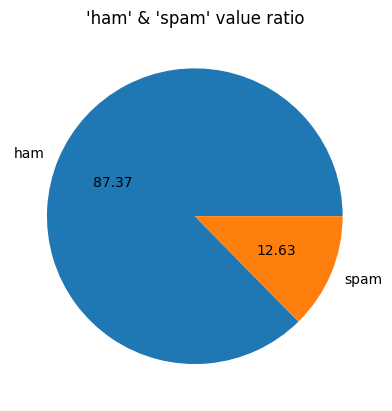

In [ ]:
plt.pie(target_values_counts, labels = ['ham','spam'], autopct = '%0.2f')
plt.title("'ham' & 'spam' value ratio")
plt.show()

**Insights found from chart?**
- it clearly shows data is imbalance ham sms percentage is 87.37% and spam sms percentage is 12.63%

#### **Creating new features from text column**

In [ ]:
#number_of_char feature to know number of characters in each document
sms_df['number_of_char'] = sms_df['text'].apply(len)

#number_of_words feature to know number of words in each document
sms_df['number_of_words'] = sms_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

#number_of_sentences feature to know number of sentences in each document
sms_df['number_of_sentences'] = sms_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
#sms_df after adding new features
sms_df.head(5)

,target,text,number_of_char,number_of_words,number_of_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#### **Observing description of characters, words, sentences in spam sms and ham sms**

In [ ]:
#describe function for only ham(not-spam) sms
sms_df[sms_df['target'] == 'ham'][['number_of_char',	'number_of_words',	'number_of_sentences']].describe()

,number_of_char,number_of_words,number_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**Oberving ham(not-spam) data for newly created feature**

- number of char mean value is 70.45

- number of words mean value is 17.12

- number of sentences mean value is 1.82


In [ ]:
#describe function for spam sms
sms_df[sms_df['target'] == 'spam'][['number_of_char',	'number_of_words',	'number_of_sentences']].describe()

,number_of_char,number_of_words,number_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


**Oberving spam data for newly created feature**

- number of char mean value is 137.89

- number of words mean value is 27.66

- number of sentences mean value is 2.97

**insights found- average of characters, words, sentences are less in ham sms this shows that ham sms are short and precise where spam sms are large**

**note-** although mean value is less for number of char and number of words for ham sms's compared to spam sms's but max value is higher in ham, there might few cases where sms were genuinely consists of large sentences

#### **Visualizing the frequency/count of characters, words, sentences in spam and ham sms, this visualization gives pictorial representation**

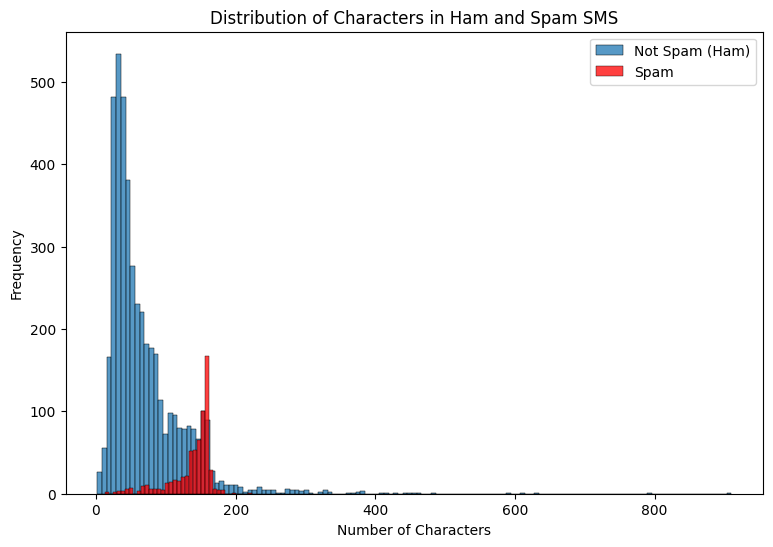

In [ ]:
#visualizing count of characters in ham and spam sms
plt.figure(figsize=(9,6))
sns.histplot(sms_df[sms_df['target'] == 'ham']['number_of_char'], label='Not Spam (Ham)')
sns.histplot(sms_df[sms_df['target'] == 'spam']['number_of_char'], color = 'red',label='Spam')
plt.legend()
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Characters in Ham and Spam SMS')
plt.show()

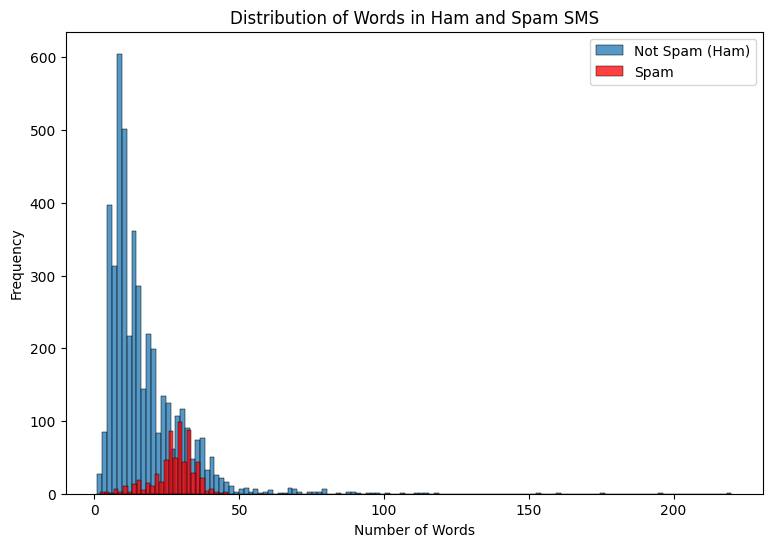

In [ ]:
#visualizing count of words in ham and spam sms
plt.figure(figsize=(9,6))
sns.histplot(sms_df[sms_df['target'] == 'ham']['number_of_words'],label='Not Spam (Ham)')
sns.histplot(sms_df[sms_df['target'] == 'spam']['number_of_words'], color = 'red',label='Spam')
plt.legend()
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Words in Ham and Spam SMS')
plt.show()

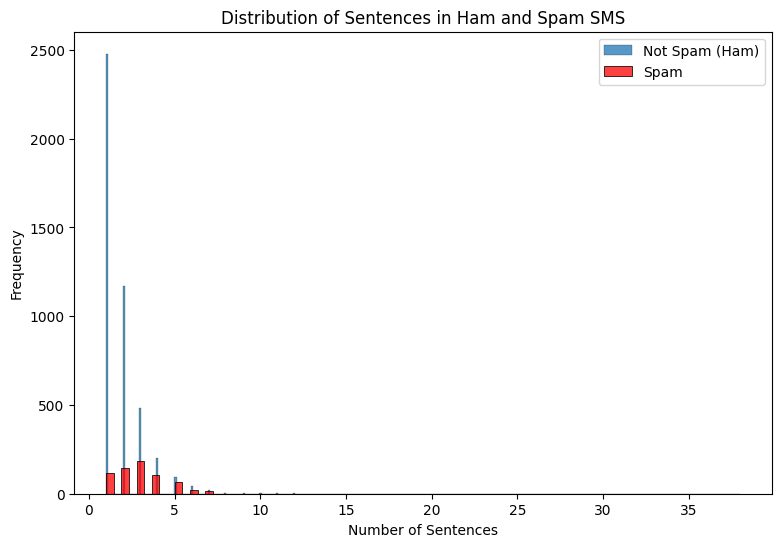

In [ ]:
#visualizing count of Sentences in ham and spam sms
plt.figure(figsize=(9,6))
sns.histplot(sms_df[sms_df['target'] == 'ham']['number_of_sentences'],label='Not Spam (Ham)')
sns.histplot(sms_df[sms_df['target'] == 'spam']['number_of_sentences'], color = 'red',label='Spam')
plt.legend()
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Distribution of Sentences in Ham and Spam SMS')
plt.show()

## **Data pre-processing**

Encoding dependent variable(target feature) to binary form 'ham' = 0 & 'spam' = 1

In [ ]:
#encoding spam and ham to binary form
encoder = LabelEncoder()
sms_df['target'] = encoder.fit_transform(sms_df['target'])

Creating a custom function for text preprocessing, steps involved in preprocessing as follows

- text.lower() - converting text to lower case letters

- text.isalnum() - filtering all special characters and returning only alphabets and numbers

- stopword removal - removing all stops words, words that helps in sentence formations and doesn't add any values to sentence.

- stemming - removing prefix and suffix of words

In [ ]:
def text_preprocessing(text):
  #converting to lower case letters
  text = text.lower()

  #tokenize words - converting sentence to list of words
  text = nltk.word_tokenize(text)

  #removing special characters from list of text
  int_text1 =[] #intermediate_text
  for i in text:
    if i.isalnum():
      int_text1.append(i)
    else:
      pass
  #removing stop words
  int_text2 =  []
  for i in int_text1:
    if i not in stopwords.words('english') and i not in string.punctuation:
      int_text2.append(i)

  #stemming - removing prefix and suffix of the words
  new_text = []
  for i in int_text2:
    new_text.append(ps.stem(i))

  return new_text

pre-processing the following text - Hello @ALmabetter! i loved the process of teaching & had great experience at learning!"

In [ ]:
text_preprocessing("Hello @ALmabetter! i loved the process of teaching & had great experience at learning!")

['hello', 'almabett', 'love', 'process', 'teach', 'great', 'experi', 'learn']

creating a new feature with text preprocessed

In [ ]:
#applying pre-processing function to text column of sms_df
sms_df['transformed_text'] = sms_df['text'].apply(text_preprocessing)
sms_df.head(5)

,target,text,number_of_char,number_of_words,number_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


### **interpreting words in spam and ham creating word cloud**

In [ ]:
#word colud initialization
wc = WordCloud(width = 700, height = 700, min_font_size = 10)
sms_df['transformed_text'] = sms_df['transformed_text'].astype(str)

Text(0.5, 1.0, 'Word colud for spam sms')

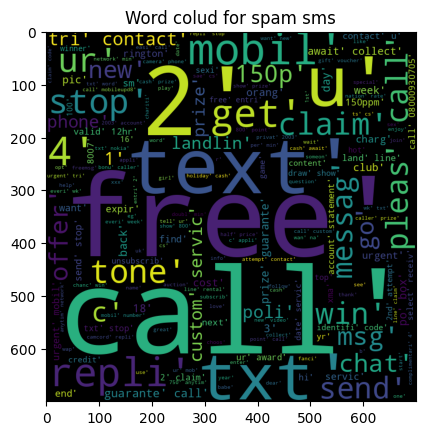

In [ ]:
#word colud generation for spam sms
spam_wc = wc.generate(sms_df[sms_df['target']==1]['transformed_text'].str.cat(sep = " "))
plt.imshow(spam_wc)
plt.title('Word colud for spam sms')

Text(0.5, 1.0, 'Word colud for ham sms')

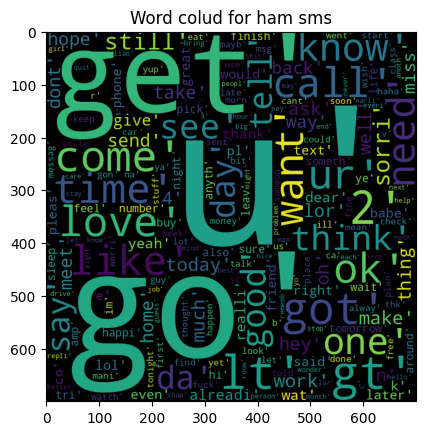

In [ ]:
#word colud generation for ham sms
ham_wc = wc.generate(sms_df[sms_df['target']==0]['transformed_text'].str.cat(sep = " "))
plt.imshow(ham_wc)
plt.title('Word colud for ham sms')

**Vizualizing words that are most repeated in spam and ham sms's**

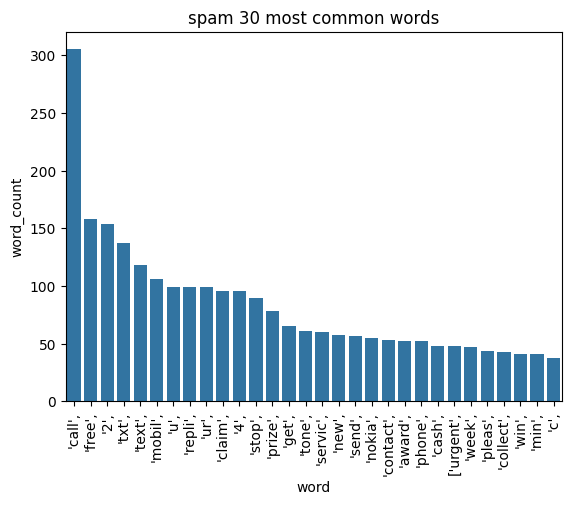

In [ ]:
#top occuring words in spam
spam_corpus = []
for msg in sms_df[sms_df['target']==1]['transformed_text'].tolist():#iterating through each spam sentence
  for word in msg.split():#iterating through each spam word
    spam_corpus.append(word)#appending words to spam_corpus
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30)) #creating dataframe with word and its frequency
spam_corpus_df.rename(columns={0: 'word', 1: 'word_count'}, inplace=True) #columns renaming

spam_corpus_df.head()
#visualizing top 30 spam words  in barplot
sns.barplot(x='word', y='word_count',data =spam_corpus_df)
plt.xticks(rotation = 'vertical')
plt.title('spam 30 most common words')
plt.show()

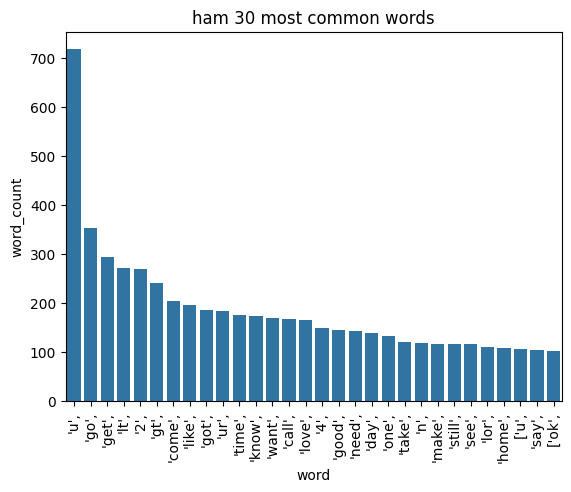

In [ ]:
#top occuring words in ham
ham_corpus = []
for msg in sms_df[sms_df['target']==0]['transformed_text'].tolist():#iterating through each ham sentence
  for word in msg.split():#iterating through each ham word
    ham_corpus.append(word)#appending words to ham_corpus
Counter(ham_corpus).most_common(30)
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30))#creating dataframe with word and its frequency
ham_corpus_df.rename(columns={0: 'word', 1: 'word_count'}, inplace=True)
ham_corpus_df.head()

#visualizing top 30 ham words  in barplot
sns.barplot(x='word', y='word_count',data =ham_corpus_df)
plt.xticks(rotation = 'vertical')
plt.title('ham 30 most common words')
plt.show()

## **Model Building**

**Creating model by Performing Count vectorization method Bag of words**

In [ ]:
#vectorizing the independent variable via count vectorizer
cv = CountVectorizer()

#fit_transform creates sparse matrix and to array converts sparse matrix to dense array
X = cv.fit_transform(sms_df['transformed_text']).toarray()
print('X.shape-',X.shape)

#target feature
y = sms_df['target'].values
print('y.shape-',y.shape)

X.shape- (5169, 6708)
y.shape- (5169,)


In [ ]:
#splitting data to train test for count vectorization
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=35 )

In [ ]:
#initializing classification models
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
gnb = GaussianNB()
mbn = MultinomialNB()
bnb = BernoulliNB()

#creating clfs dictionary to store classification models
clfs = {'gnb':gnb,
        'mbn': mbn,
        'bnb': bnb,
        'lr': lr,
        'dtree': dtree}

In [ ]:
#custom function to train and predict data for multiple models
def train_classifiers(clfs,X_train, X_test, y_train, y_test):
  model = []
  accuracy_scores_list = []
  precision_scores_list = []
  for name, clf in clfs.items():#iterate over each classifier from clfs dictionary
    clf.fit(X_train,y_train) #training classifier by training data
    y_pred = clf.predict(X_test) #predicting the classifiers
    accuracy = accuracy_score(y_test,y_pred) #calculating accuracy score
    precision = precision_score(y_test,y_pred) #precision accuracy score
    model.append(name)
    accuracy_scores_list.append(accuracy)
    precision_scores_list.append(precision)
  return model, accuracy_scores_list, precision_scores_list

#predicting accuracy & precision scores for classification models with countvectorization
model, accuracy_scores_list, precision_scores_list = train_classifiers(clfs,X_train, X_test, y_train, y_test)

In [ ]:
# creating performnce_df_CV matrix with models, accuracy & precision scores
performnce_df_CV = pd.DataFrame({'algorithm': model, 'CV_Accuracy': accuracy_scores_list, 'CV_Precision': precision_scores_list})
performnce_df_CV

,algorithm,CV_Accuracy,CV_Precision
0,gnb,0.869439,0.485477
1,mbn,0.971954,0.866667
2,bnb,0.972921,0.980769
3,lr,0.978723,1.000000
4,dtree,0.959381,0.830769


**Interpreting model preformance by Term frequency-inverse document frquency vectorization method**

In [ ]:
#vectorizing the independent variable via TF-IDF
tfidf = TfidfVectorizer()

#fit_transform creates sparse matrix and to array converts sparse matrix to dense array
X_tf = tfidf.fit_transform(sms_df['transformed_text']).toarray()
print('X_tf.shape-',X_tf.shape)

X_tf.shape- (5169, 6708)


In [ ]:
#splitting data to train test for TF-IDF vectorization
Xtf_train, Xtf_test, y_train, y_test = train_test_split(X_tf,y, test_size=0.2, random_state=35 )

In [ ]:
#predicting accuracy & precision scores for classification models with TF-IDF vectorization
model, accuracy_scores_list, precision_scores_list = train_classifiers(clfs,Xtf_train, Xtf_test, y_train, y_test)

# creating performnce_df_tfidf matrix with models, accuracy & precision scores
performnce_df_tfidf = pd.DataFrame({'algorithm': model, 'tfidf_Accuracy': accuracy_scores_list, 'tfidf_Precision': precision_scores_list})
performnce_df_tfidf

,algorithm,tfidf_Accuracy,tfidf_Precision
0,gnb,0.867505,0.481172
1,mbn,0.973888,1.000000
2,bnb,0.972921,0.980769
3,lr,0.961315,0.988889
4,dtree,0.957447,0.808824


In [ ]:
#comparision table preformance of models by Countvectorization and TF-IDF vectorization
performnce_df = pd.merge(performnce_df_CV,performnce_df_tfidf, on = 'algorithm')
performnce_df

,algorithm,CV_Accuracy,CV_Precision,tfidf_Accuracy,tfidf_Precision
0,gnb,0.869439,0.485477,0.867505,0.481172
1,mbn,0.971954,0.866667,0.973888,1.000000
2,bnb,0.972921,0.980769,0.972921,0.980769
3,lr,0.978723,1.000000,0.961315,0.988889
4,dtree,0.959381,0.830769,0.957447,0.808824


**Insights found from performance table-**

- **first** logistic regression alogorithm has highest accuracy 0.978 and precision 1 with Count vectorization method

- **second** multinomial naive bayes algorithm has accuracy 0.973 and precision 1 with TF-IDF vectorization method

**Evaluation metrics as accuracy and precision**

**- Accuracy -** it measures overall correctness of the model, ratio of correctly classified instances to total number of instances in dataset

**- Precision -** It measures propotion of coorectly identified spam messages among all messages predicted, ratio of correctly classified spam message to sum of correctly classified spam message and incorrectly classified spam message

**note-** Our model should correctly identify spam messages hence, precision should be 1

In [ ]:
performnce_df.describe()

,CV_Accuracy,CV_Precision,tfidf_Accuracy,tfidf_Precision
count,5.000000,5.000000,5.000000,5.000000
mean,0.950484,0.832736,0.946615,0.851931
std,0.045851,0.207144,0.044799,0.221699
min,0.869439,0.485477,0.867505,0.481172
25%,0.959381,0.830769,0.957447,0.808824
50%,0.971954,0.866667,0.961315,0.980769
75%,0.972921,0.980769,0.972921,0.988889
max,0.978723,1.000000,0.973888,1.000000


**Since logistic regression model is performing well with accuracy 0.978 and precision 1, hyperparameter tuning is not necessary, Since data is highly imbalance performing stratified Kfold and evaluating model performance for logistic regression with countvectorization**

### **Performing stratified KFold for logistic regression model by using GridserachCV to find best performing number Kfold to handle imbalanced data**

In [ ]:
#logistic regression with count vectorization, stratified Kfold
def evaluate_folds(folds, X, y):
    results = []
    for i, (train_idx, test_idx) in enumerate(folds):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        lr = LogisticRegression(max_iter=1000)
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        results.append({'Fold': i+1, 'Accuracy': accuracy, 'Precision': precision})

    return pd.DataFrame(results)

def perform_stratified_kfold(X, y, n_splits):
    # Creating stratified k-fold cross-validator with specified number of folds
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Generate folds
    folds = [(train_index, test_index) for train_index, test_index in stratified_kfold.split(X, y)]

    # Evaluate folds
    results_table = evaluate_folds(folds, X, y)
    return results_table


results_table = perform_stratified_kfold(X, y, n_splits=10)
print(results_table)

   Fold  Accuracy  Precision
0     1  0.978723   0.982143
1     2  0.978723   1.000000
2     3  0.980658   1.000000
3     4  0.974855   0.933333
4     5  0.974855   0.981481
5     6  0.970986   0.980769
6     7  0.982592   1.000000
7     8  0.974855   0.981818
8     9  0.984526   1.000000
9    10  0.980620   0.982456


In [ ]:
#creating performance table for logistic regression Stratified KFold
k_fold_performance_df = pd.DataFrame(results_table)
k_fold_performance_df.sort_values(['Accuracy','Precision'],ascending = False)

,Fold,Accuracy,Precision
8,9,0.984526,1.000000
6,7,0.982592,1.000000
2,3,0.980658,1.000000
9,10,0.980620,0.982456
1,2,0.978723,1.000000
0,1,0.978723,0.982143
7,8,0.974855,0.981818
4,5,0.974855,0.981481
3,4,0.974855,0.933333
5,6,0.970986,0.980769


In [ ]:
k_fold_performance_df.describe()

,Fold,Accuracy,Precision
count,10.00000,10.000000,10.000000
mean,5.50000,0.978139,0.984200
std,3.02765,0.004181,0.020050
min,1.00000,0.970986,0.933333
25%,3.25000,0.974855,0.981566
50%,5.50000,0.978723,0.982299
75%,7.75000,0.980648,1.000000
max,10.00000,0.984526,1.000000


**insights found-**

- highest Accuracy 0.984 and precsion 1 at 9 KFold

- Lowest accuracy 0.97 and precision 0.98 at 6 folds

- average model performance accuracy 0.978 and precision 0.984

## **Conclusion -**

- Logistic regression alogirthm has highest accuracy of 0.978 and precision of 1 with CountVectorization

- logistic regression with Stratified Kfold with 9 folds performs well accuracy 0.984 and precision of 1, average accuracy is 0.97 and precision 0.98

### **Fun coding**


In [ ]:
#assigning model
model = LogisticRegression()
#training model
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
def predict_spam_or_ham(sentence, model, cv):
    # Preprocess the input sentence
    preprocessed_value = text_preprocessing(sentence)
    preprocessed_value = " ".join(preprocessed_value)

    # Transform the preprocessed sentence into a feature vector using the CountVectorizer
    X_value = cv.transform([preprocessed_value]).toarray()

    # Predict the class label
    predicted_label = model.predict(X_value)
    predicted_label_ = 'ham' if predicted_label == 0 else 'spam'

    return predicted_label_

value = input("Enter a sentence: ")#almabetter is a crazy data science course
predicted_label = predict_spam_or_ham(value, model, cv)
print("Predicted label:", predicted_label)

Enter a sentence: almabetter is a crazy data science course
Predicted label: ham
